In [47]:
import pandas as pd

In [48]:
results = pd.read_csv('survey_results_public.csv')

In [247]:
#For those who are employed full-time, what are the counts men vs. women?

employed = results.loc[results['Employment'] == 'Employed full-time']
gender = employed.groupby("Gender").size()
gender = pd.DataFrame(gender, columns = ['Count'])
gender = gender.reset_index()

In [248]:
binary = ['Man', 'Woman']
nonbinary = gender[~gender['Gender'].isin(binary)]
binary = gender[gender['Gender'].isin(binary)]
nonbinary = nonbinary.agg(['sum'])

In [249]:
frames = [binary, nonbinary]
counts = pd.concat(frames)
counts = counts.set_index('Gender')

In [250]:
non = counts.index[2]
counts = counts.rename(index = {non: 'Non-binary'})


In [279]:
#Condsidering people who are employed full-time, how much do men make on average as compared to women and non-binary people?
employed = results.loc[results['Employment'] == 'Employed full-time']
gender = employed.groupby("Gender").sum()
gender = gender.reset_index()

In [280]:
binary = ['Man', 'Woman']
nonbinary = gender[~gender['Gender'].isin(binary)]
binary = gender[gender['Gender'].isin(binary)]
nonbinary = nonbinary.agg(['sum'])

In [281]:
frames = [binary, nonbinary]
comps = pd.concat(frames)
comps = comps.set_index('Gender')

In [282]:
non = comps.index[2]
comps = comps.rename(index = {non: 'Non-binary'})

In [283]:
comps = comps.reset_index()

In [284]:
counts = counts.reset_index()

In [285]:
counts

,level_0,index,Gender,Count
0,0,0,Man,32664
1,1,1,Woman,2747
2,2,2,Non-binary,427


In [286]:
counts_dict = counts.set_index('Gender')['Count'].to_dict()
comps['Counts'] = comps['Gender'].map(counts_dict.get)

In [287]:
comps['AverageComp'] = comps['ConvertedComp'].divide(comps['Counts'])

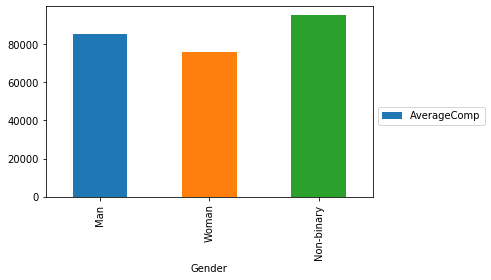

In [289]:
comp_plot = comps.plot.bar(x = 'Gender', y = 'AverageComp')
box = comp_plot.get_position()
comp_plot.set_position([box.x0, box.y0, box.width * 0.8, box.height])
#put the legend outside the plot area
lgd = comp_plot.legend(bbox_to_anchor = (1, .5), fontsize = 'medium')
plt.tight_layout()
plt.savefig('employed_comp_gender.png', bbox_inches = 'tight', dpi = 100)

In [304]:
#Do employed men make significantly more money than employed women on average?
from scipy import stats
women = employed[employed['Gender']=="Woman"]
men = employed[employed['Gender']=='Man']

In [313]:
men = list(men['ConvertedComp'].dropna())
women= list(women['ConvertedComp'].dropna())

TypeError: list indices must be integers or slices, not str

In [314]:
stats.ttest_ind(men,women)

Ttest_indResult(statistic=0.99362019387651102, pvalue=0.32041640687963147)